In [2]:
#all the import statements here
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
#Read driving_log.csv and the images(Udacity Training Set, No New images generated for this assignment)

data = pd.read_csv("./data/driving_log.csv")
print(data.shape)
print(data.shape[0])

data.head()

(8036, 7)
8036


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


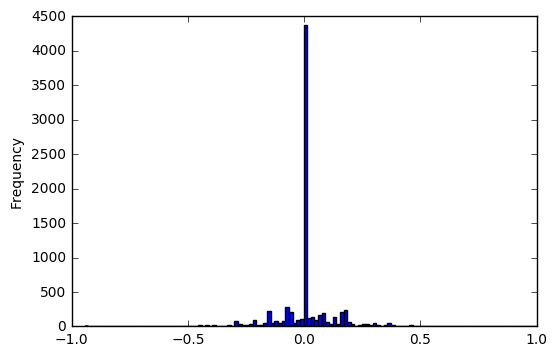

In [4]:
#display the data sample
#Similar to how we plotted histogram for Traffic Sign Classification. Plotting Histogram...
#To see how well the data set is balanced
steering_angle = data["steering"]
steering_angle_counts=np.unique(steering_angle,return_counts=True)
bins_hist = steering_angle_counts[1].size
steering_angle.plot.hist(bins=bins_hist)
plt.show()
#print(steering_angle_counts[1].size)#we have 124 different steering angles in the training set
#As we can see in the below histogram, steering angle 0 is the predominant one. Car is driven in the center mostly.
#I might need to create the Recovery Training Set if this data doesn't perform well on the track

In [ ]:
#Loading the images
X_center = data["center"]
X_left = data["left"]
X_right = data["right"]


img = []
#Displaying 9 images. 3 from each center, left, right
#added strip() on the names as some of the images have spaces in their names in the driving_log.csv file
for i in range(3):
    img.append(mpimg.imread(X_center[i].strip()))
    img.append(mpimg.imread(X_left[i].strip()))
    img.append(mpimg.imread(X_right[i].strip()))
    
    
for i in range(9):
    axis = plt.subplot(3,3,i+1)
    axis.set_xticklabels([])
    axis.set_yticklabels([])
    plt.imshow(img[i])
plt.show()

print(X_center[1].strip())
print(img[0].shape)#Printing given image shape. It is 160,320, 3. Need to re-size for the NVIDIA Model-66,208,3

In [ ]:
#using CV2 to display images. Commenting out as image displaying is not required twice
# image = cv2.imread("IMG/center_2016_12_01_13_30_48_287.jpg")
# image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# plt.imshow(image)
# plt.show()

In [ ]:
image = img[0]
#Resizing image to remove the sky and the hood. Hint taken from the peers from Slack channel to avoid fitting trees and sky
print(image.shape)

image = image[45:145,:]
print(image.shape)

image = cv2.resize(image, (208,66))
plt.imshow(image)
plt.show()

In [ ]:
#Resizing images for NVIDIA Model
def resize(image_loc):
    image_loc = image_loc.strip()
    image = cv2.imread(image_loc)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    new_image = cv2.resize(image, (208,66))
    return new_image

In [ ]:
#commenting this code, will try to use fit_generator
# X_center_rs=[]
# X_left_rs=[]
# X_right_rs=[]
# for i in range(len(X_center)):
#     X_center_rs.append(resize(X_center[i]))
#     X_left_rs.append(resize(X_left[i]))
#     X_right_rs.append(resize(X_right[i]))

# X_center_rs = np.array(X_center_rs)
#steering_angle = np.array(steering_angle)

In [ ]:
#commenting this code, will try to use fit_generator
#generating more data
#let me flip random images and add to the training set
# X_center_flip = []
# steering_angle_flip = []
# for i in range(len(X_center_rs)):
#     flip = np.random.randint(2)
#     image = X_center_rs[i]
#     steer = steering_angle[i]
#     if flip==0:
#         image = cv2.flip(image, 1)
#         steer = -steer
#     X_center_flip.append(image)
#     steering_angle_flip.append(steer)


# X_center_rs = np.append(X_center_rs,X_center_flip, axis=0)
# steering_angle = np.array(steering_angle)
# steering_angle = np.append(steering_angle,steering_angle_flip, axis=0)
        


In [ ]:
#all the functions here
def preprocessed_data(row):
    steering = row['steering']
    #print("preprocess_daa")
    # randomly choose the camera to take the image from
    camera = np.random.choice(['center', 'left', 'right'])

    # adjust the steering angle for left anf right cameras
    if camera == 'left':
        steering += 0.25
    elif camera == 'right':
        steering -= 0.25

    #imag_ = load_img("IMG/" + row[camera].strip())
    #print(camera)
    image_loc = row[camera][0]
    #print(image_loc)
    image_loc = image_loc.strip()
    #print(image_loc)
    image = cv2.imread(image_loc)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #image = np.array(image)
    #print("hi1")
    # decide whether to horizontally flip the image:
    # This is done to reduce the bias for turning left that is present in the training data
    flip_prob = np.random.random()
    if flip_prob > 0.5:
        # flip the image and reverse the steering angle
        steering = -1*steering
        image = cv2.flip(image, 1)

    # Apply brightness augmentation
    #image = augment_brightness_camera_images(image)

    # Crop, resize and normalize the image
    image = image[55:135, :, :]
    image = cv2.resize(image,(64,64))
    image  = image/255.-.5
    return image, steering

def train_generaotr(data_df):
    batch_images = np.zeros((32, 64, 64, 3))
    batch_angles = np.zeros(32)
    #print("in train")
    while True:
        for i in range (32):
            # Randomly get a sample from the input data
            #print(i)
            idx = np.random.randint(len(data_df))

            # reset_index sets this data_df starting row to 0
            data_row = data_df.iloc[[idx]].reset_index()
            img1, angle1 = preprocessed_data(data_row)

            batch_images[i] = img1
            batch_angles[i] = angle1
            
        yield batch_images, batch_angles
    
    #yield images, angles#using yield instead of return as we need generator but not the iterator

def valid_generator(validation_data):
    while(True):
        row = validation_data.loc[0]
        steering = row['steering']
        img = row['center']
        yield img, steering
    

In [ ]:
#model goes here. After reading all the peers blog post, i am going to directly start off with NVIDIA.
#I would see this as another version of Transfer Learning, learning from peers experience and directly hitting NVIDIA Model.
#No Preprocessing done yet. As I wanted to see how the car performs without performing any transformation(except resizing) and then play
#with the transformations.
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Convolution2D, MaxPooling2D, Dropout
def keras_lab():
    model = Sequential()
    model.add(Convolution2D(32,3,3,border_mode='valid', input_shape=(64,64,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(43))
    model.add(Activation('relu'))
    model.add(Dense(1))
    
    model.compile('adam','mse')
    return model

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#y_one_hot = OneHotEncoder(y_train,len(y_train))

OHC = OneHotEncoder()

n_classes = np.unique(steering_angle).size
print(n_classes)
Y_ohc = OHC.fit(np.arange(n_classes).reshape(-1, 1))
y_one_hot = Y_ohc.transform(steering_angle.reshape(-1, 1)).toarray()

In [ ]:
#Running the model
from keras.models import model_from_json
import json
from keras.preprocessing.image import img_to_array, load_img
model = keras_lab()
#X_center_rs = np.array(X_center_rs)
#history = model.fit(X_center_rs, steering_angle, batch_size=128, nb_epoch=15, validation_split=0.2)
#model.fit_generator(train_generator, validation_data=validation_generator,
                        #samples_per_epoch=samples_per_epoch, nb_epoch=1, nb_val_samples=3000)


In [ ]:
def get_primes(number):
    while True:
        if is_prime(number):
            yield number
        number += 1

def is_prime(number):
    return True

In [ ]:
#df = df.sample(frac=1).reset_index(drop=True)
data = data
data = data.sample(frac=1).reset_index(drop=True)
#splitting data into 80%training, 20%validation
training_data_index = int(data.shape[0]*0.8)
training_data = data.loc[0:training_data_index-1]
validation_data = data.loc[training_data_index:]
#print(training_data.shape)
#print(validation_data.shape)

#testing generator with yield
#gener_exam = get_primes(5)
#print(gener_exam)
training_generaotr = train_generaotr(training_data)
#print(train_generaotr)
validation_generator = train_generaotr(validation_data)
#print(validation_generator)
history = model.fit_generator(training_generaotr, validation_data=validation_generator,
                              samples_per_epoch=2016, nb_epoch=10, nb_val_samples=1000)



#fit_generator(self, generator, samples_per_epoch, nb_epoch, verbose=1, callbacks=None, validation_data=None, nb_val_samples=None, class_weight=None, max_q_size=10, nb_worker=1, pickle_safe=False, initial_epoch=0)
Arguments

generator: a generator. The output of the generator must be either
a tuple (inputs, targets)
a tuple (inputs, targets, sample_weights). All arrays should contain the same number of samples. The generator is expected to loop over its data indefinitely. An epoch finishes when samples_per_epoch samples have been seen by the model.

samples_per_epoch: integer, number of samples to process before going to the next epoch.

nb_epoch: integer, total number of iterations on the data.

verbose: verbosity mode, 0, 1, or 2.

callbacks: list of callbacks to be called during training.

validation_data: this can be either
a generator for the validation data
a tuple (inputs, targets)
a tuple (inputs, targets, sample_weights).

nb_val_samples: only relevant if validation_data is a generator. number of samples to use from validation generator at the end of every epoch.

class_weight: dictionary mapping class indices to a weight for the class.

max_q_size: maximum size for the generator queue

nb_worker: maximum number of processes to spin up

pickle_safe: if True, use process based threading. Note that because this implementation relies on multiprocessing, you should not pass non picklable arguments to the generator as they can't be passed easily to children processes.

initial_epoch: epoch at which to start training (useful for resuming a previous training run)

In [ ]:
json_string = model.to_json()
with open("model.json", 'w') as outfile:
    json.dump(json_string, outfile)
model.save_weights("model.h5")